# Sample application


In the following, the application of pycombina for solution of a combinatorial integral approximation problem is exemplified.


## Problem setup

A combinatorial integral approximation problem for a sample data set shall be solved. The setup includes ``n_c = 3`` binary controls with each ``n_b = 149`` values and maximum switching constraints of ``sigma_max = [2, 2, 2]``, i. e. only two switching actions per control are allowed.

### Load sample data from file and visualize

The first column of the file contains the time points, the other columns contain the relaxed binary values:

In [1]:
import numpy as np

data = np.loadtxt("sample_data.csv", skiprows = 1)

t = data[:,0]
b_rel = data[:-1,1:]

sigma_max = [2, 2, 2]

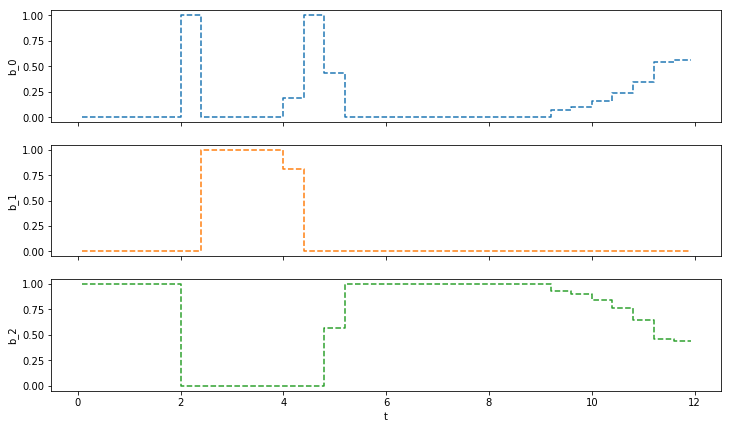

In [2]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize = (12,7))
ax1.step(t[:-1], b_rel[:,0], color = "C0", linestyle="dashed", where = "post")
ax1.set_ylabel("b_0")
ax2.step(t[:-1], b_rel[:,1], color = "C1", linestyle="dashed", where = "post")
ax2.set_ylabel("b_1")
ax3.step(t[:-1], b_rel[:,2], color = "C2", linestyle="dashed", where = "post")
ax3.set_ylabel("b_2")
ax3.set_xlabel("t")
plt.show()

### Pass problem data to pycombina and check dimensions

For this, we instatiante an object of the class ``Combina``. This class contains the methods for solution of combinatorial integral approximation problems as well as some possibilities to check that the data we passed to pycombina was interpreted correctly. A welcome message is shown at the first start within a session.

In [3]:
from pycombina import Combina

combina = Combina(t, b_rel)

assert(combina.N_c == 3)
assert(combina.N_b == t.size-1)


-----------------------------------------------------------
|                                                         |
|                      You're using                       |
|                                                         |
|    pycombina -- Combinatorial Integral Approximation    |
|                                                         |
|       by A. Buerger, C. Zeile, S. Sager, M. Diehl       |
|                                                         |
-----------------------------------------------------------



### Solve combinatorial integral approximation problem

For solution of the problem, we choose the customized Branch-and-Bound method, and pass the maximum switching constraints.

In [9]:
combina.solve(solver = "gurobi", max_switches = sigma_max)

Optimize a model with 2676 rows, 892 columns and 74172 nonzeros
Variable types: 445 continuous, 447 integer (447 binary)
Coefficient statistics:
  Matrix range     [8e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-11, 8e+00]
Found heuristic solution: objective 8.1428242
Presolve removed 77 rows and 0 columns
Presolve time: 0.06s
Presolved: 2599 rows, 892 columns, 73056 nonzeros
Variable types: 1 continuous, 891 integer (891 binary)

Root relaxation: objective 1.420973e-01, 1168 iterations, 0.06 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.14210    0  308    8.14282    0.14210  98.3%     -    0s
H    0     0                       1.8540053    0.14210  92.3%     -    0s
H    0     0                       0.9771758    0.14210  85.5%     -    0s
H    0     0                       0.7095057    0.14210  80